# Make Greenland mask

Makes a mask for Greenland

In [1]:
import matplotlib.pyplot as plt
import cartopy.feature as cfeature
import cartopy.io.shapereader as shpreader
import cartopy.crs as ccrs

In [2]:
NSIDCNorthPolarStereo = ccrs.Stereographic(central_latitude=90,
                                           central_longitude=-100.,
                                           true_scale_latitude=70.)

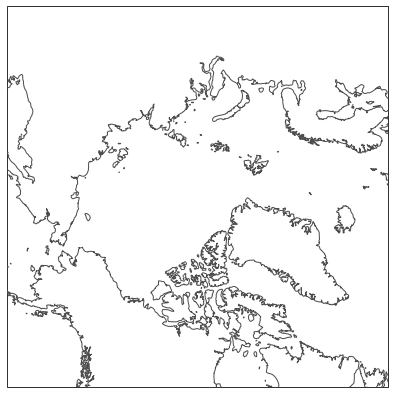

In [58]:
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(projection=NSIDCNorthPolarStereo)
ax.set_extent([-3500000., 3500000., -3500000., 3500000.], NSIDCNorthPolarStereo)
ax.add_feature(cfeature.COASTLINE, zorder=3, edgecolor='0.3')

shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()
for idx, country in enumerate(countries):
    if country.attributes['ADM0_A3'] == "GRL":
        ax.add_geometries([country.geometry], ccrs.PlateCarree(),
                          facecolor=(1, 1, 1),
                          label=country.attributes['ADM0_A3'])


In [53]:
shpfilename = shpreader.natural_earth(resolution='110m',
                                      category='cultural',
                                      name='admin_0_countries')
reader = shpreader.Reader(shpfilename)
countries = reader.records()

#print(len(list(countries)))

for idx, country in enumerate(countries):
    if country.attributes['ADM0_A3'] == "GRL":
        print(f"{idx}  ADMIN: *{country.attributes['ADMIN']}*  ADM0_A3: *{country.attributes['ADM0_A3']}* {country.attributes['ADM0_A3'] == 'GRL'}")
    #for key, value in country.attributes.items():
    #    print(f"{key}: {value}")
    #print(country.attributes['ADMIN'])
    #break

22  ADMIN: *Greenland                          *  ADM0_A3: *GRL* True


In [28]:
len(countries)

TypeError: object of type 'generator' has no len()